<a href="https://colab.research.google.com/github/vadkts/vadkts/blob/main/CaseKaggle_SpaceshipTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In this case we will use ScikitLearn library and many others lib for processing the Data! I would like this code to be useful to you. Let's get started!

Now we should get data from Kaggle.
web: https://www.kaggle.com/competitions/spaceship-titanic/data

In [3]:
data_train = pd.read_csv('train (2).csv')
data_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


After we looking for the data we should check our axis. In different axis we have non-value information. For example : Destination, Cabin and Name.

Lets watch the histohram of our data axises

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

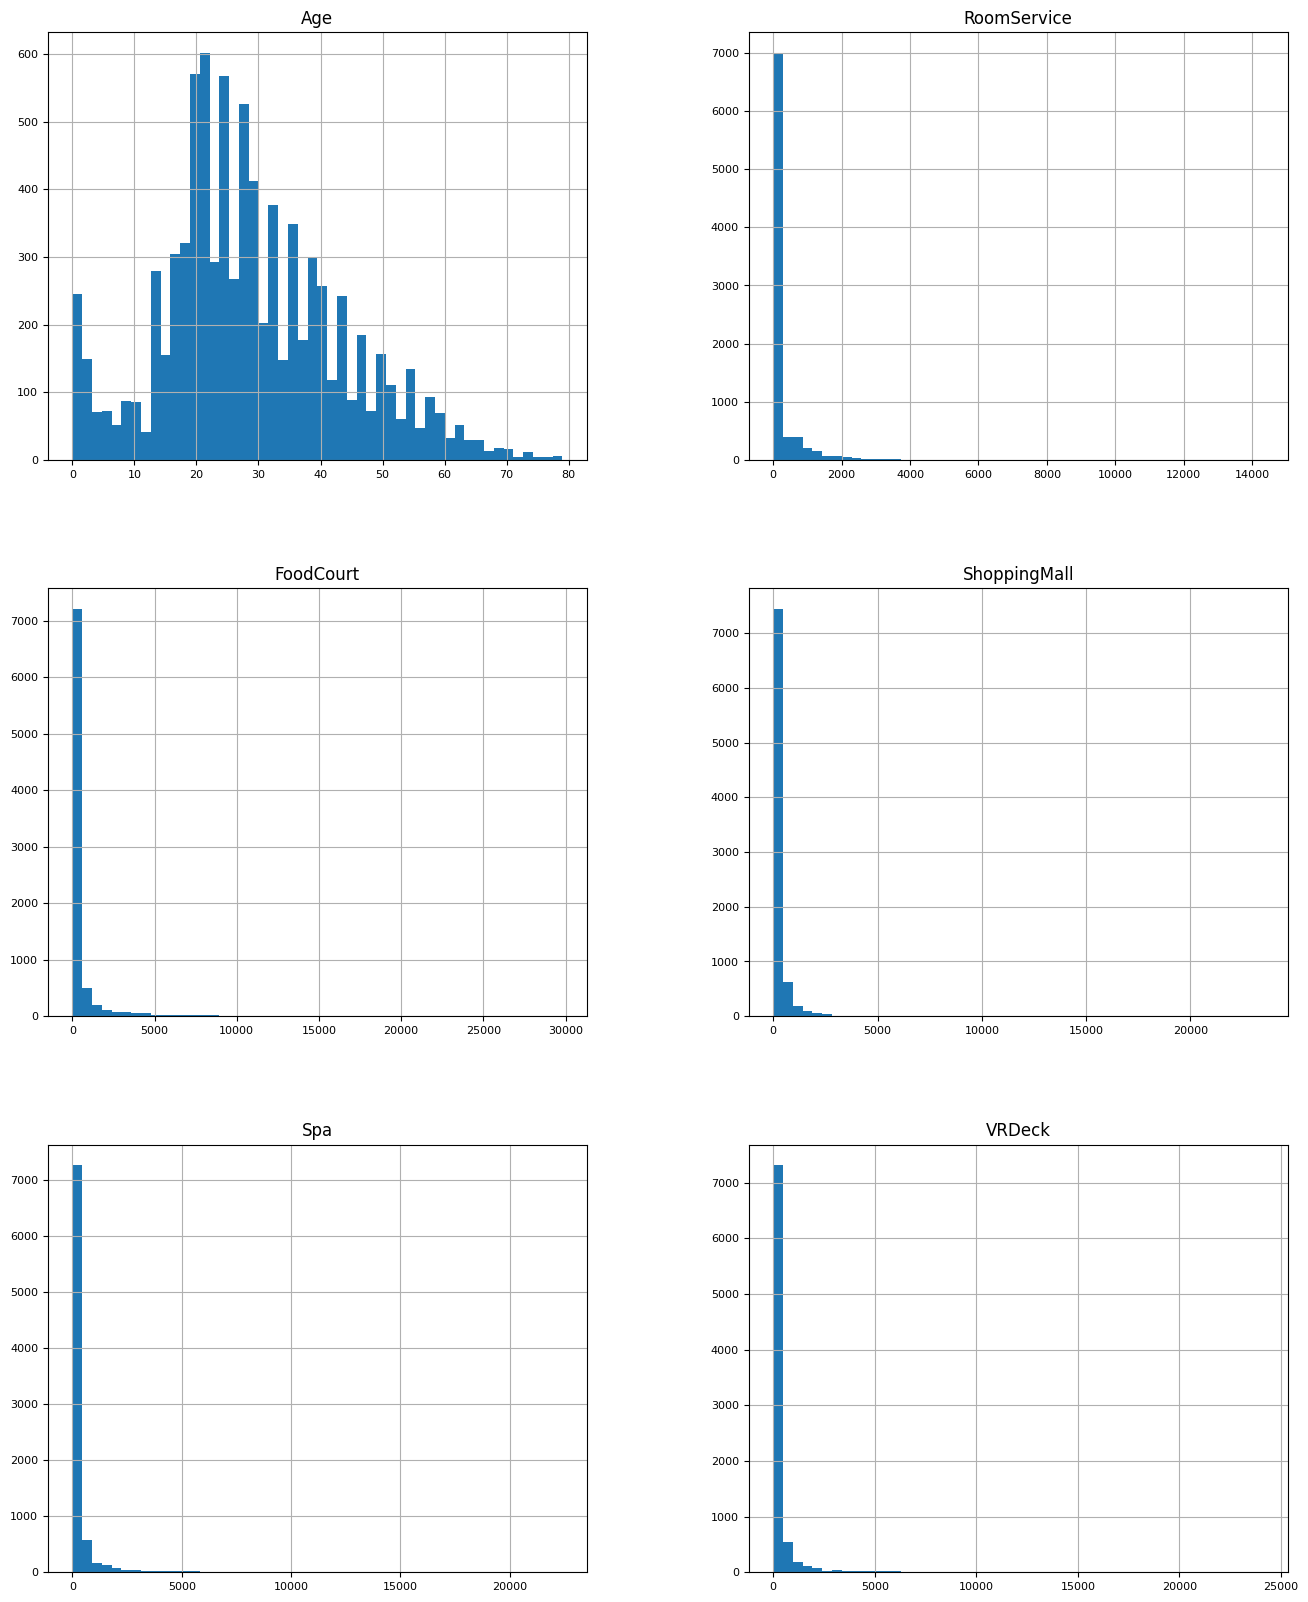

In [4]:
data_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Looking at the histohram i can say that data is not very different (excluding age) , so we can go start!


In [5]:
data = data_train.select_dtypes(include = ['float64', 'int64'])
data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [6]:
from sklearn.model_selection import train_test_split
X_train = data.fillna(0)
y_train = data_train['Transported']

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'min_samples_split':range(20, 100), 'min_samples_leaf': range(100, 500),
              'max_depth': [5], 'criterion':['entropy']}
clf_cosmos = RandomForestClassifier()
clfcosmos_search = RandomizedSearchCV(clf_cosmos, parameters, cv = 3)
clfcosmos_search.fit(X_train, y_train)
clfcosmos_search.best_params_

{'min_samples_split': 56,
 'min_samples_leaf': 107,
 'max_depth': 5,
 'criterion': 'entropy'}

In [8]:
best_clf_cosmos = clfcosmos_search.best_estimator_
best_clf_cosmos

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=107,
                       min_samples_split=56)

In [9]:
best_clf_cosmos.score(X_train, y_train)

0.7883354423099045

In [17]:
from sklearn.model_selection import train_test_split
data_test = pd.read_csv('test (1).csv')
data_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [13]:
data_test = data_test.select_dtypes(include = ['float64', 'int64'])
X_test = data_test.fillna(0)

In [18]:
y_pred = best_clf_cosmos.predict(X_test)

In [19]:
y_pred

array([ True, False,  True, ...,  True,  True,  True])